<a href="https://colab.research.google.com/github/leikcaro/hit_musical/blob/main/Proyecto_2_Spotify_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

He elegido este dataset para practicar algunos elementos de Data Science y DAta Analisys que me parecen interesantes, me gusta mucho la musica y me parece un proyecto divertido de abordar

About Dataset

Context

This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities.


Content

artist: Name of the Artist.

song: Name of the Track.

duration_ms: Duration of the track in milliseconds.

explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
year: Release Year of the track.

popularity: The higher the value the more popular the song is.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

genre: Genre of the track.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np


Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo/Proyecto 2/songs_normalize.csv'
df = pd.read_csv(filename)
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [ ]:
#podemos observar que no hay valores nulos, que hay solo 3 columnas no numericas, y que hay mucha info interesante para poder predecir.
# en este caso, mi objetivo será predecir la popularidad de una cancion en base a sus características y ver cuales son los factores que más importan para lograr la fama!

df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


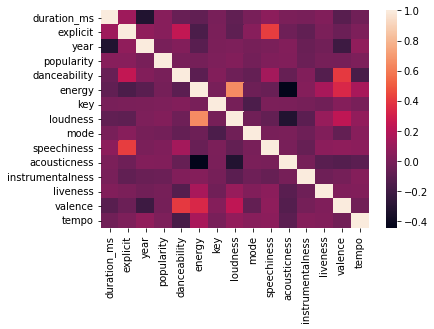

In [ ]:
#antes de agregar el one hot, revisaremos las correlaciones
#interesante, se ven muchas correlaciones pero practicamente ninguna es un fuerte predictor de la popularidad
import seaborn as sns

sns.heatmap(df.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2822427290>,
      dtype=object)

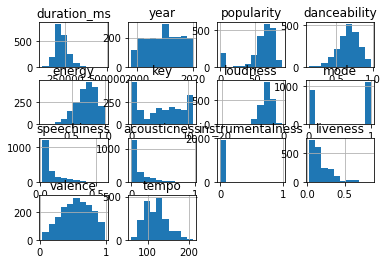

In [ ]:
df.hist()

In [ ]:
#De partida, artist y song son columnas que, ademas de ser strings, no aportan valor, ahora bien, el artista en si claramente afecta, ya qu su popularidad es muy probable que
#sea un factor clave para el exito de una canción, pero por lo mismo, excluiremos ambas del analisis
#finalmente, la columna explicit es bool por lo que no debiera presentar problema en el analisis, sino, se cambiaria a 1 o 0  y la columna genre está compuesta de "Tags"
#que seria ideal poder transformar con one hot encoding, donde quede con 1 en donde corresponda. No se la forma en la que esto se pueda realizar pero la investigaré ( ej: dejaremos rock y pop, si una cancion tiene el tag)
#rock, queda con un 1 0, si es pop, queda 0 1 y si es rock, pop en la columna queda 1 1)

In [ ]:
df['genre'].value_counts().count()

59

In [ ]:
generos = df['genre'].str.split(',') # Esto separará los 
                                         #elementos de tu string 
                                         # en una lista
generos.head()

0              [pop]
1       [rock,  pop]
2    [pop,  country]
3     [rock,  metal]
4              [pop]
Name: genre, dtype: object

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
result = mlb.fit_transform(generos.to_numpy()) # elementos separados
                                                     # por columna

In [ ]:
result

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
result=pd.DataFrame(result, columns=mlb.classes_)
result

,Dance/Electronic,Folk/Acoustic,R&B,blues,classical,country,easy listening,hip hop,jazz,latin,...,R&B,World/Traditional,country,easy listening,hip hop,latin,metal,pop,rock,set()
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df=pd.concat([df, result], axis=1)

In [ ]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,R&B,World/Traditional,country,easy listening,hip hop,latin,metal,pop,rock,set()
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,0,0,0,0,0,0,0,1,0,0
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0,0,0,0,0,0,0,0,1,0
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0,0,0,0,0,0,0,1,0,0
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,0,0,0,0,0,0,0,0,1,0
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,0,0,0,0,0,0,0,1,0,0
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,0,0,0,0,0,0,0,1,0,0
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,0,0,0,0,1,0,0,0,0,0
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df=df.drop(['artist', 'song', 'genre'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration_ms        2000 non-null   int64  
 1   explicit           2000 non-null   bool   
 2   year               2000 non-null   int64  
 3   popularity         2000 non-null   int64  
 4   danceability       2000 non-null   float64
 5   energy             2000 non-null   float64
 6   key                2000 non-null   int64  
 7   loudness           2000 non-null   float64
 8   mode               2000 non-null   int64  
 9   speechiness        2000 non-null   float64
 10  acousticness       2000 non-null   float64
 11  instrumentalness   2000 non-null   float64
 12  liveness           2000 non-null   float64
 13  valence            2000 non-null   float64
 14  tempo              2000 non-null   float64
 15   Dance/Electronic  2000 non-null   int64  
 16   Folk/Acoustic     2000 

In [ ]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,R&B,World/Traditional,country,easy listening,hip hop,latin,metal,pop,rock,set()
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,...,0.00650,0.005000,0.005500,0.000500,0.388000,0.007500,0.004500,0.4680,0.081000,0.011000
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,...,0.08038,0.070551,0.073976,0.022361,0.487416,0.086299,0.066948,0.4991,0.272903,0.104329
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0000,0.000000,0.000000
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [ ]:
rep_bool={True:1,False:0}
df["explicit"]=df["explicit"].replace(rep_bool)


duration_ms
explicit
year
popularity
danceability
energy
key
loudness
mode
speechiness
acousticness
instrumentalness
liveness
valence
tempo
 Dance/Electronic
 Folk/Acoustic
 R&B
 blues
 classical
 country


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


 easy listening
 hip hop
 jazz
 latin
 metal
 pop
 rock
Dance/Electronic
Folk/Acoustic
R&B
World/Traditional
country
easy listening
hip hop
latin
metal
pop
rock
set()


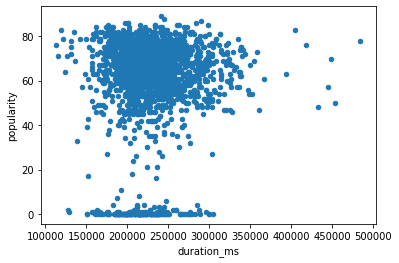

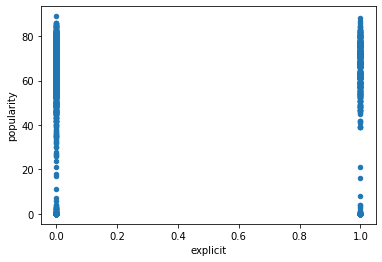

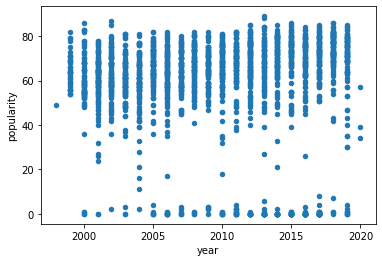

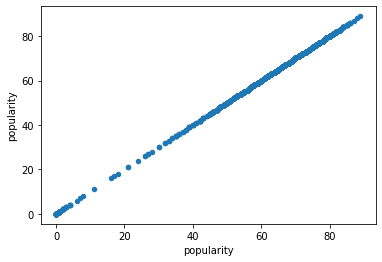

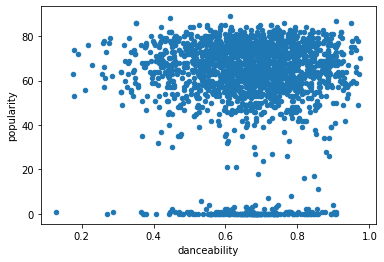

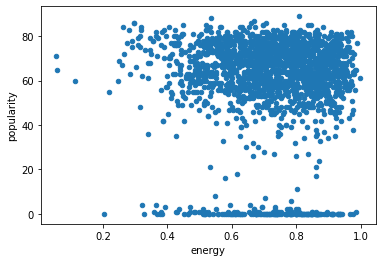

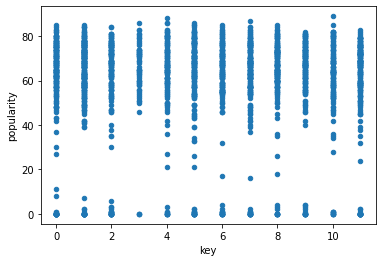

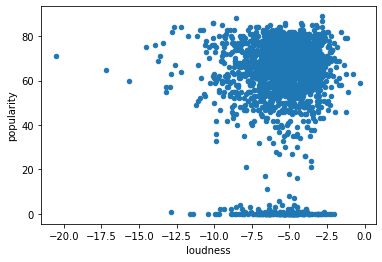

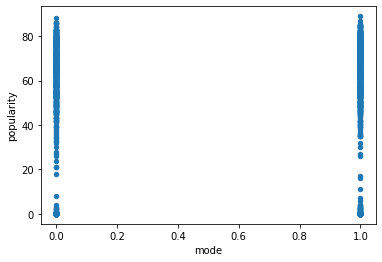

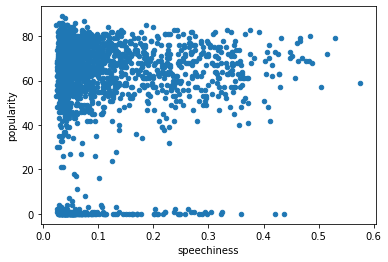

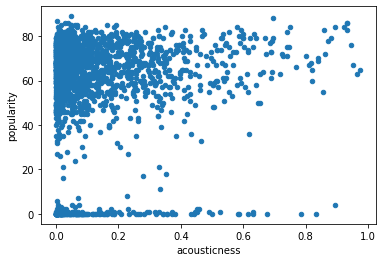

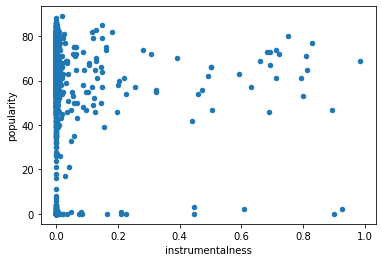

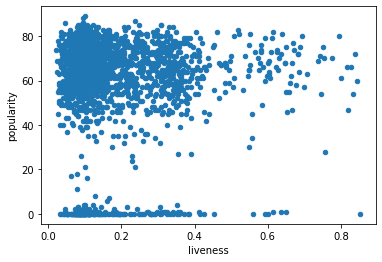

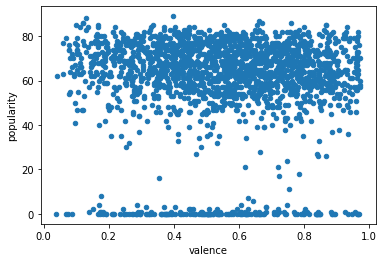

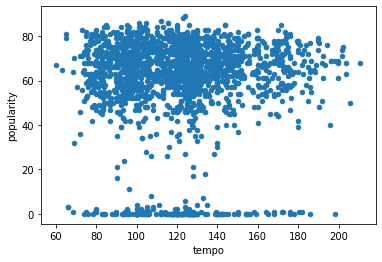

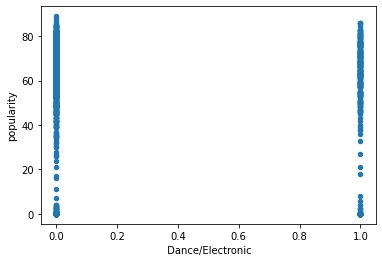

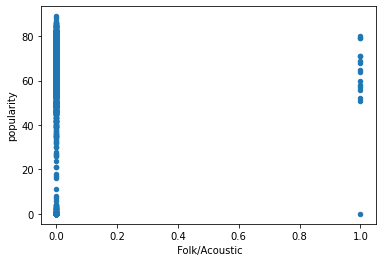

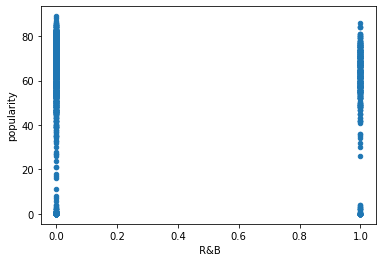

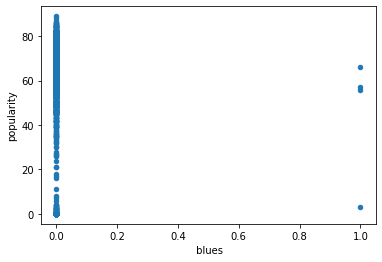

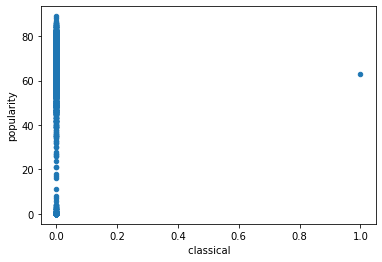

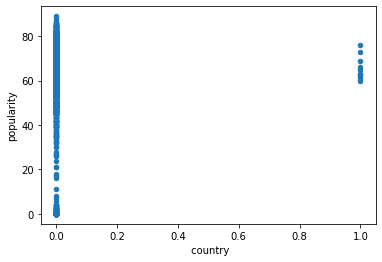

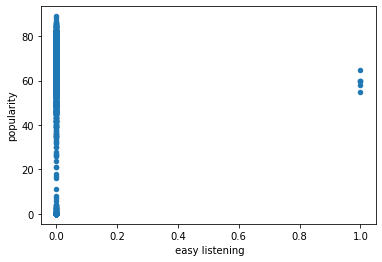

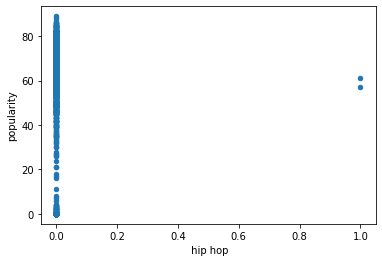

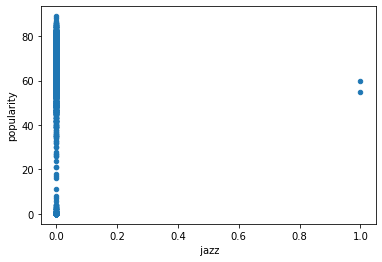

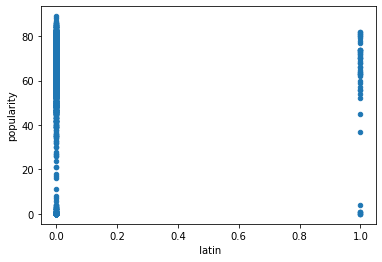

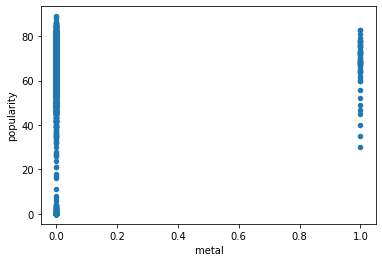

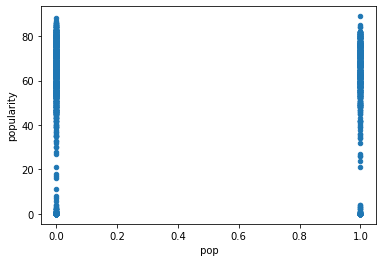

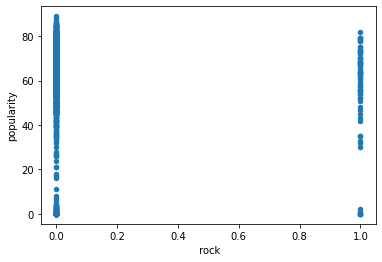

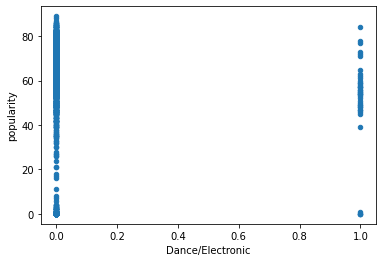

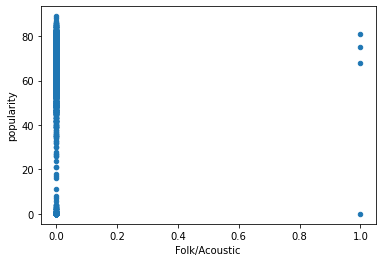

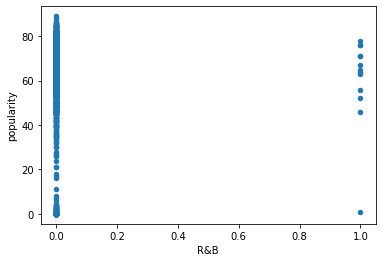

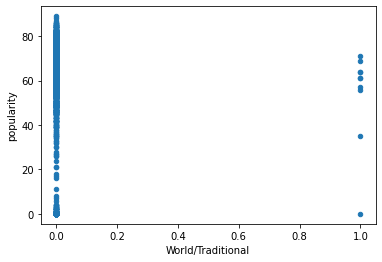

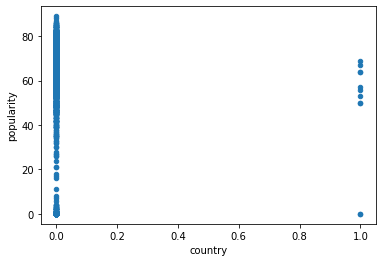

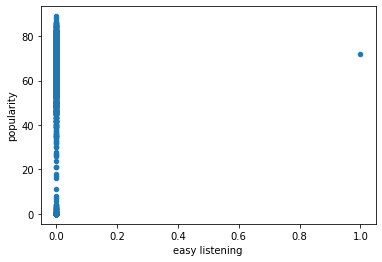

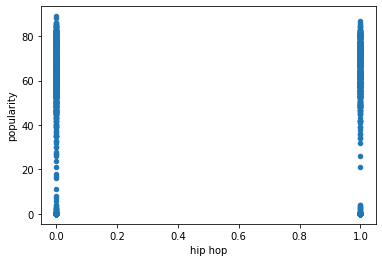

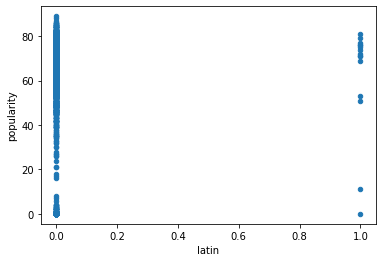

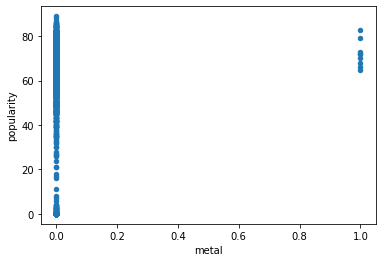

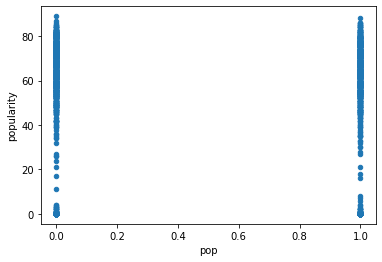

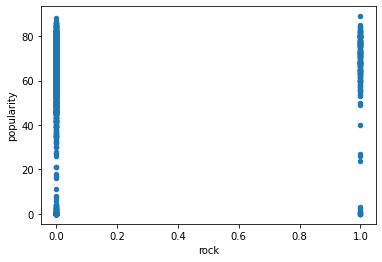

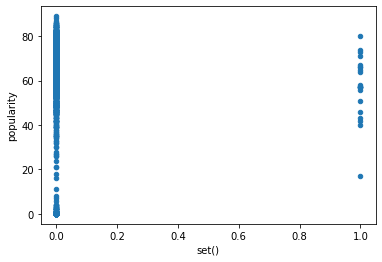

In [ ]:
for i in df.columns:
  print (i)
  df.plot.scatter(x=i, y='popularity')

In [ ]:
#dada la info anterior, se ve muy dificil que la regresion lineal funcione, de todas maneras lo probaremos, de hecho tampoco se ve que la regresión polinomial o logistica sirvan

In [ ]:
# por lo que ahora crearemos un modelo de regresion que, ojalá, nos permita entender de mejor manera qué factores son los que 
#mas contribuyen a la popularidad de una cacnion (excluyendo la fama del cantante)
from sklearn.model_selection import train_test_split
X=df.drop("popularity", axis=1)
y=df.popularity

In [ ]:
X.head()

,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,R&B,World/Traditional,country,easy listening,hip hop,latin,metal,pop,rock,set()
0,211160,False,2000,0.751,0.834,1,-5.444,0,0.0437,0.3000,...,0,0,0,0,0,0,0,1,0,0
1,167066,False,1999,0.434,0.897,0,-4.918,1,0.0488,0.0103,...,0,0,0,0,0,0,0,0,1,0
2,250546,False,1999,0.529,0.496,7,-9.007,1,0.0290,0.1730,...,0,0,0,0,0,0,0,1,0,0
3,224493,False,2000,0.551,0.913,0,-4.063,0,0.0466,0.0263,...,0,0,0,0,0,0,0,0,1,0
4,200560,False,2000,0.614,0.928,8,-4.806,0,0.0516,0.0408,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#¿Qué tipo de preguntas sobre ciencia de datos puedes responder en función de tus datos?
- Cuales son los factores que inciden en la popularidad de una cancion, o bien, predecir, en base a las caracteristicas de una cancion, su posible popularidad
#¿Es esta una tarea supervisada o no supervisada?
-Supervisada
#Si se trata de una tarea supervisada, ¿es una tarea de regresión o clasificación?
-Regresión
#¿Qué tan limpios están tus datos?
-Bastante limpios pero igual tuve que hacer algunas transformaciones
#¿Qué problemas crees que pueden surgir?
-Que el modelo no prediga bien.

In [ ]:
# importar modelo de regresión lineal
from sklearn.linear_model import LinearRegression
# Hacer una instancia de regresión lineal
reg = LinearRegression(fit_intercept=True)

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
score = reg.score(X_test, y_test)
score

0.016813634361921292

In [ ]:
#tal como lo supuse la regresion lineal no funciona, probemos con random forest:
